In [4]:
from tensorboard.backend.event_processing import event_accumulator

In [5]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys
sys.path.append('../')
%aimport log_plotter
from log_plotter import get_run_names_events, get_data_pth_events, OOMFormater
import matplotlib.pyplot as plt

In [8]:
import numpy as np
from scipy import interpolate
import matplotlib.ticker as mtick

In [9]:
patterns = ['.*init2.*']
logdir = '/home/iman/nuqsgd/runs/'
events = get_run_names_events(logdir, patterns)
tag_name = 'tot_var_norm'
data = get_data_pth_events(logdir, events, [tag_name])[0]

In [10]:

plt.rcParams.update({'font.size': 16})
def plot_smooth_o1(x, y, *args, **kwargs):
    plot_smooth(x, y, 100, 1, *args, **kwargs)

#1f77b4 0.5
#ff7f0e 0.625
#2ca02c 0.75
#d62728 0.875


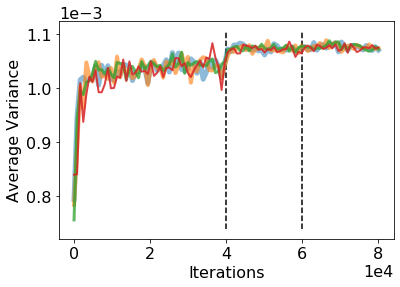

In [40]:
tot_len = len(data[:4])
for index, record in enumerate(data[:4]):
    record = record[tag_name]
    x = record[0]
    y = record[1]
    x_smooth = np.linspace(x.min(), x.max(), 100)
    tck = interpolate.splrep(x, y, s=0)
    y_smooth = interpolate.splev(x_smooth, tck, der=0)
    lw = 5-4*index/tot_len
    ls=['-','-', '-', '-'][index%4]


    p = plt.plot(x_smooth, y_smooth, alpha=(index) / (tot_len) * 0.5 + 0.5, linestyle=ls, linewidth=lw)
    print(p[0].get_color(), (index) / (tot_len) * 0.5 + 0.5)

bot, top = plt.ylim()
plt.ylabel('Average Variance')
plt.xlabel('Iterations')
ax = plt.gca()
# ax.set_yscale('log')
ax.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.vlines(40000, bot, top, linestyle='--')
plt.vlines(60000, bot, top, linestyle='--')
plt.savefig('figs/variance-change.pdf', bbox_inches='tight', dpi=100)
